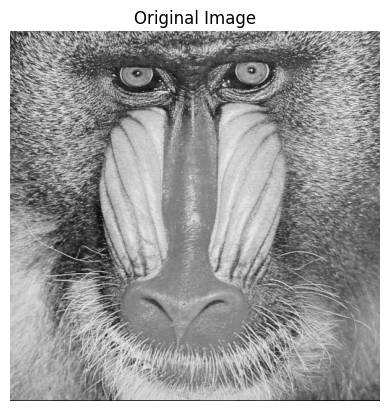

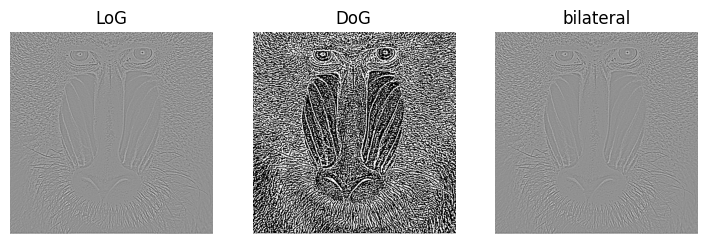

In [11]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = '4.2.03 - Copy.tiff'
# Load image
img = cv2.imread("4.2.03 - Copy.tiff",0) 
 # Use grayscale for filtering
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Original Image'); plt.show()

# TODO: Apply DoG
blur = cv2.GaussianBlur(img, (5,5), 1)
blur1 = cv2.GaussianBlur(img, (5,5), 1)
blur2 = cv2.GaussianBlur(img, (5,5), 2)
dog = blur1 - blur2

plt.figure(figsize=(12,4))
plt.subplot(1,4,3); plt.imshow(dog, cmap="gray"); plt.axis('off'); plt.title("DoG")
# TODO: Apply LoG
log = cv2.Laplacian(blur, cv2.CV_64F)
plt.subplot(1,4,2); plt.imshow(log, cmap="gray"); plt.axis('off'); plt.title("LoG")
# TODO: Apply bilateral (edge-preserving) filter
filtered = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
plt.subplot(1,4,4); plt.imshow(log, cmap="gray"); plt.axis('off'); plt.title("bilateral")
plt.show()
# Show all results for comparison

    LoG → Edge detection with noise reduction.
	DoG → Approximation of LoG, sharper, highlights edges + textures.
	Bilateral → Smoothing/denoising while keeping edges intact.


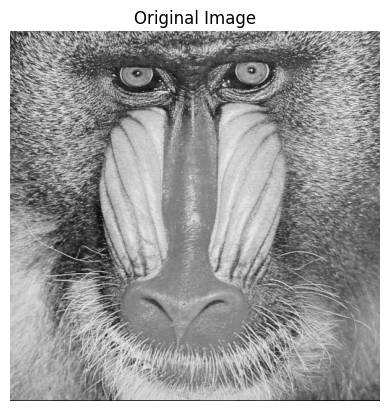

In [ ]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = '4.2.03 - Copy.tiff'
# Load image & Detect and plot SIFT keypoints
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Original Image'),plt.show()
sift_Detector = cv2.SIFT_create()
sift_keypoints, descriptors = sift_Detector.detectAndCompute(img.astype(np.uint8), None)
img_sift = cv2.drawKeypoints(img, sift_keypoints,None)
cv2.imshow("sift keypoints",img_sift)
# Detect and plot ORB keypoints
orb = cv2.ORB_create()
keypoints = orb.detect(img)
keypoints, descriptors = orb.compute(img, keypoints)
imageresult = cv2.drawKeypoints(img, keypoints, None, color=(255,0,0), flags=0)
cv2.imshow('orb', imageresult)
cv2.waitKey(0)
cv2.destroyAllWindows()
# TODO: Count and compare number of keypoints for SIFT and ORB
print ("Number of SIFT keypoints:", len(sift_keypoints)) 
print ("Number of ORB keypoints:",len(keypoints))

Keypoint Counts
SIFT detected 240 keypoints  
ORB detected 500 keypoints  
Comparison
SIFT returns roughly 2.5× more keypoints than ORB’s default setting.  
ORB is capped by its `nfeatures` parameter (default = 500), so you’ll always see fewer points unless you explicitly raise that limit.  
SIFT’s multi-scale Difference-of-Gaussian detector finds richer detail, while ORB trades off coverage for speed and rotation invariance.

In [ ]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = '4.2.03 - Copy.tiff'
path = '4.2.03 - Copy.tiff'
# Load image
img = cv2.imread("4.2.03 - Copy.tiff",0) 
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Original Image')
plt.show()
# Load second image
img2 = cv2.imread(4.2.03 - Copy.tiff"",0) 
plt.imshow(img2, cmap='gray'); plt.axis('off'); plt.title('Original')
plt.show()

# Find the keypoints and descriptors with SIFT for both images
splash_keypoints, splash_descriptors = sift_Detector.detectAndCompute(img, None)
couples_keypoints, couples_descriptors = sift_Detector.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(splash_descriptors, couples_descriptors, k=2)
number_of_matches = len(matches)

# Draw matches using matplotlib for display in Jupyter
img_matches = cv2.drawMatchesKnn(img, splash_keypoints, img2, couples_keypoints, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(12, 6))
plt.imshow(img_matches)
plt.axis('off')
plt.title('SIFT Matches ({number_of_matches} matches)')
plt.show()

# bonus TODO: Try with ORB or FLANN if you like


In [ ]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
path = '4.2.03 - Copy.tiff'
# Load image
img = cv2.imread("4.2.03 - Copy.tiff",0) 
 # Use grayscale for filtering
plt.figure(), plt.imshow(img, cmap='gray', vmin=0, vmax=255); plt.axis('off'); plt.title('Original Image')
plt.show()
# Add *'salt and pepper'* noise to the image with density of 0.02
noisyImg = random_noise(img, mode="s&p",amount=0.02)
noisyImg = np.array(255*noisyImg, dtype="uint8")
plt.figure(), plt.imshow(noisyImg, cmap="gray", vmin=0, vmax=255),plt.axis('off'), plt.title('Noisy Image')
kernel= np.array([[-1,5,-1],[0,-1,0]])
sharpened= cv2.filter2D(img,-1,kernel)
blur = cv2.GaussianBlur(img, (5,5), 1)
blur1 = cv2.GaussianBlur(img, (5,5), 1)
blur2 = cv2.GaussianBlur(img, (5,5), 2)
dog = blur1 - blur2
plt.figure(figsize=(12,12))
plt.subplot(1,4,3); plt.imshow(dog, cmap="gray"); plt.axis('off'); plt.title("DoG")



Noise increased the number of detected edges but many were false, making matching less reliable. Sharpening improved contrast at boundaries, which helped identify keypoints more clearly. This shows preprocessing strongly affects results.

Not all of them match.To improve, I could use the ratio test, cross-checking, or try FLANN for better matching.